Q1-A

*** عکس خروجی ها داخل فایل pdf شده هستش ***

در این قسمت از تمرین باید تمرین باید عکس‌ هایی که در دایرکتوری تست ست موجود بود را با عکس های موجود در دایرکتوری دیتا ست مقایسه میکردیم و بهترین عکس را از لحاظ تشابه با هر عکس پیدا میکردیم. برای این کار باید در این قسمت از روش اس وی دی استفاده میکردیم. به این صورت که ابتدا اس‌ وی دی هر عکس را پیدا کرده و سپس مقدار سیگما ی این عکس را با سیگما ی اس وی دی های هر عکس مقایسه میکردیم. برای این مقایسه ما مقدار این دوتا ماتریس را از هم کم میکنیم و سپس از ماتریس بدست آمده نرم میگیریم تا یک مقدار به ما بدهد. همین کار را برای هر عکس انجام میدهیم و کمترین مقدار به ما شبیه ترین عکس را خواهد داد. برای انجام این کار ها توابع مختلفی نوشته شده است که هر کدام کار مربوط به خود را انجام میدهند مثلا تابع اس وی دی یک ماتریس میگیرد اس وی دی این ماتریس را حساب میکند و سیگمای مربوط به آن را خروجی میدهد. در نهایت برای اینکه بتوانیم مقدار دقت این روش را حساب کنیم یک متغیر با نام کانت در نظر گرفتیم و هر بار که یک عکس درست تشخیص داده میشود یکی به آن اضافه میشود. درنهایت مقدار این این کانت را بر تعداد کل فایل های موجود در تست ست تقسیم میکنیم تا دقت را به ما بدهد.

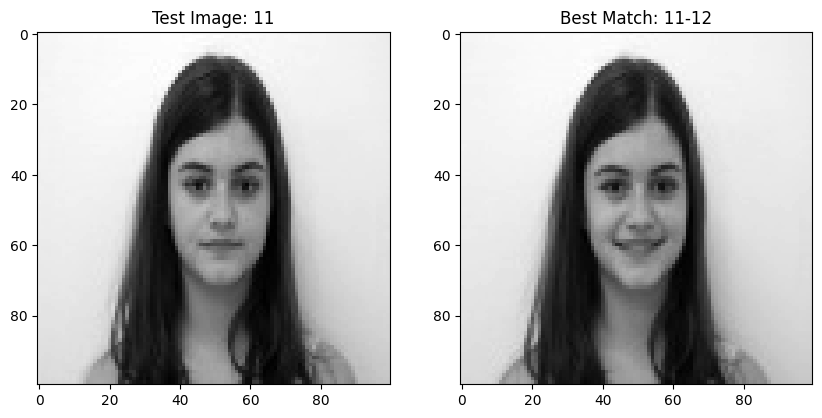

permision accepted .test image ID 11 matches with dataset image ID 11.


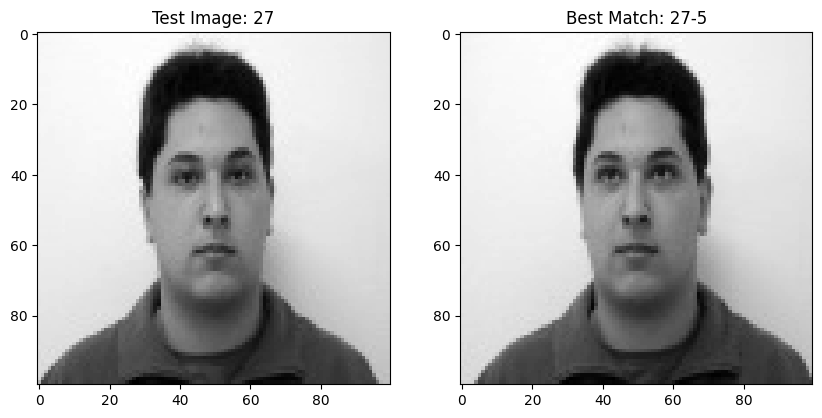

permision accepted .test image ID 27 matches with dataset image ID 27.


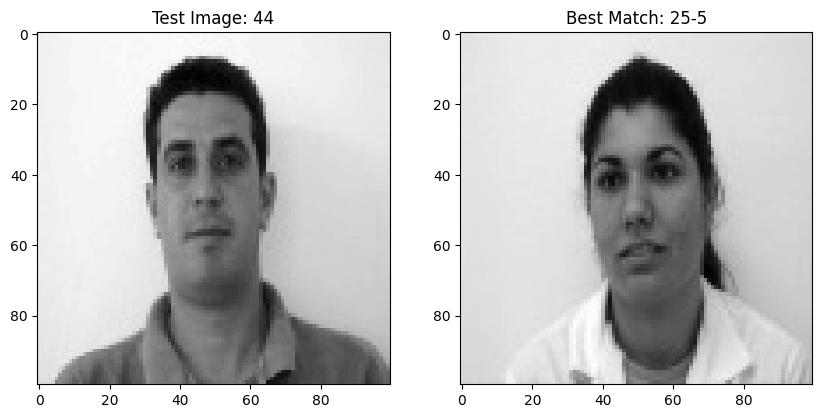

permision denied .test image ID 44 doesnot match with dataset image ID 25.


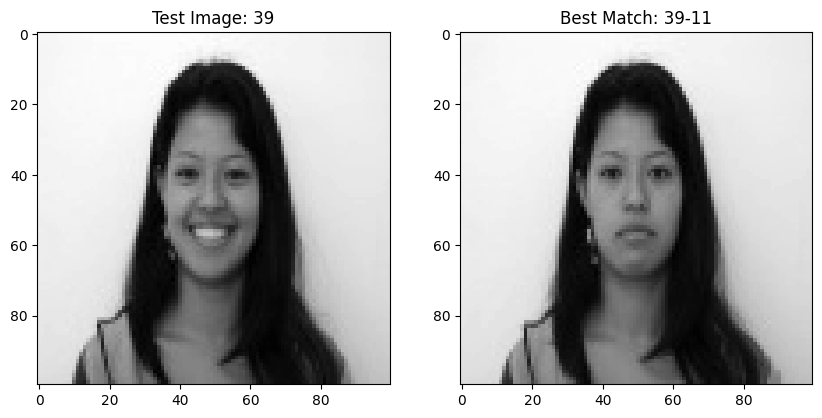

permision accepted .test image ID 39 matches with dataset image ID 39.


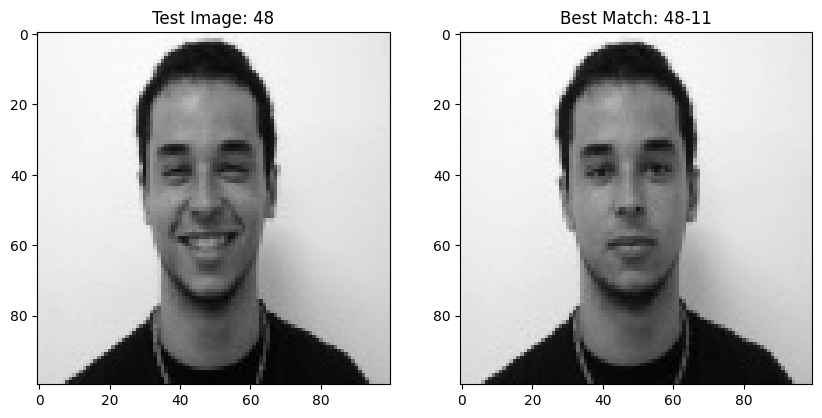

permision accepted .test image ID 48 matches with dataset image ID 48.


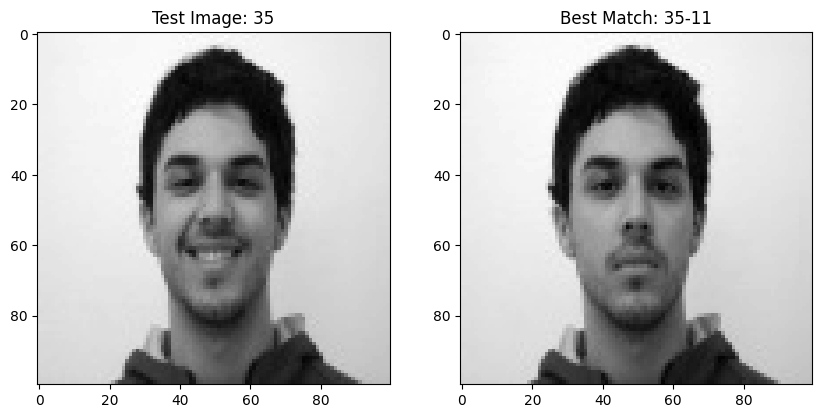

permision accepted .test image ID 35 matches with dataset image ID 35.


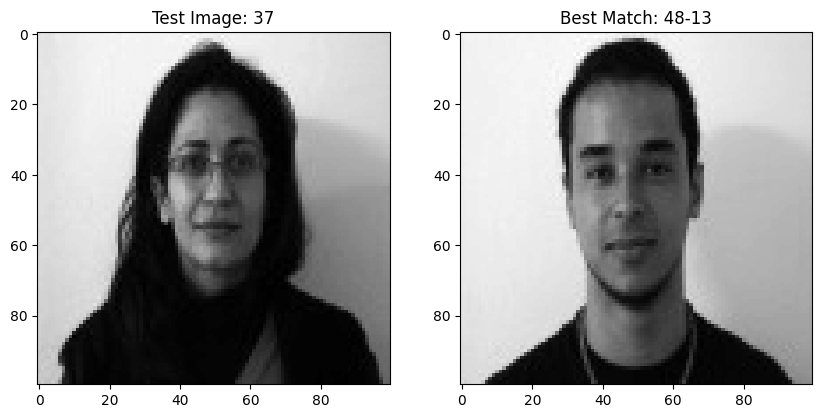

permision denied .test image ID 37 doesnot match with dataset image ID 48.


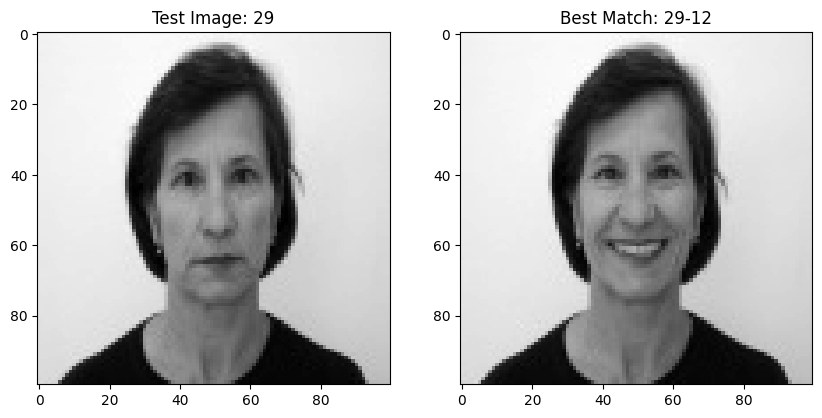

permision accepted .test image ID 29 matches with dataset image ID 29.


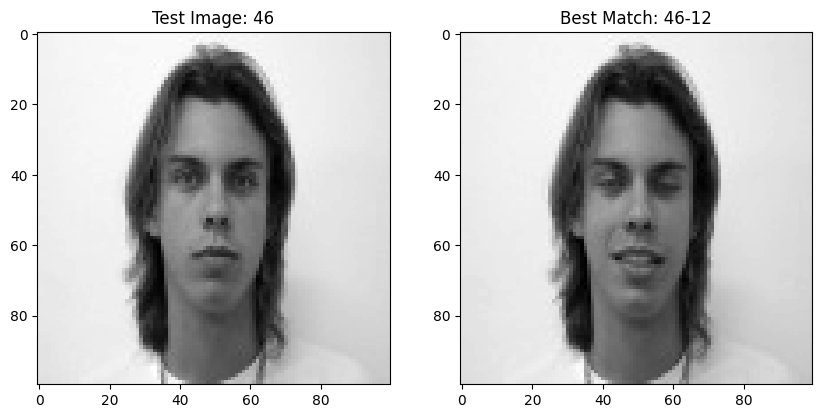

permision accepted .test image ID 46 matches with dataset image ID 46.


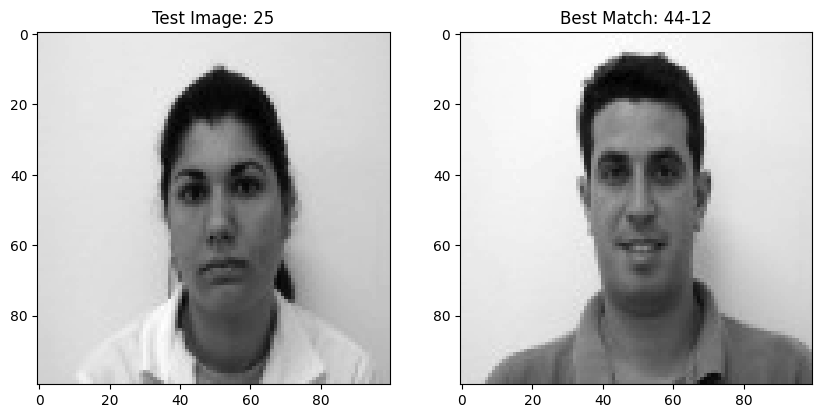

permision denied .test image ID 25 doesnot match with dataset image ID 44.


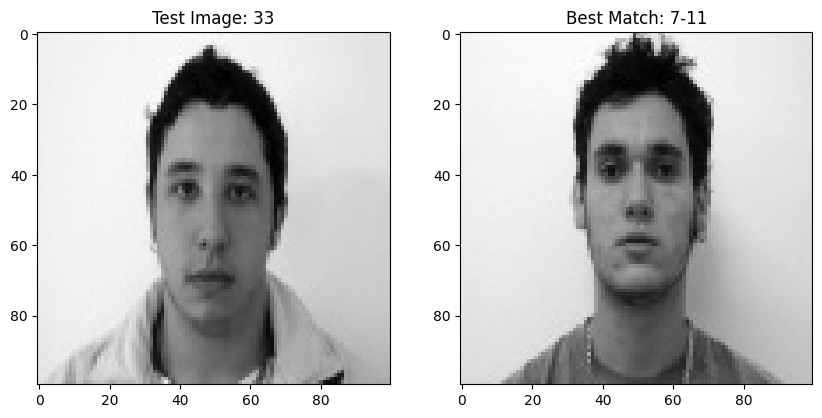

permision denied .test image ID 33 doesnot match with dataset image ID 7.


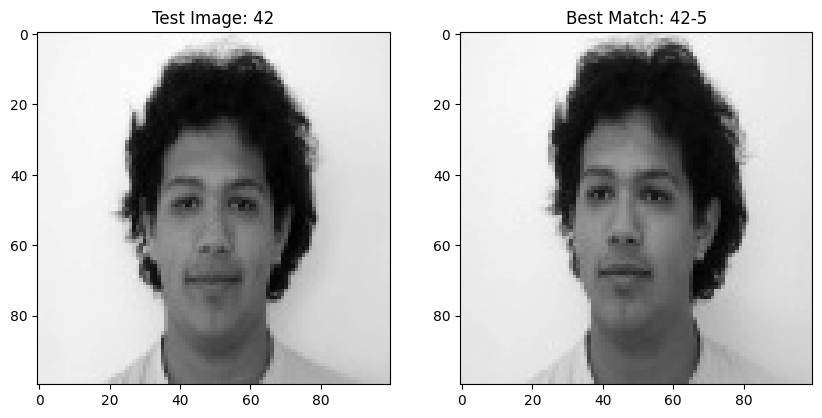

permision accepted .test image ID 42 matches with dataset image ID 42.


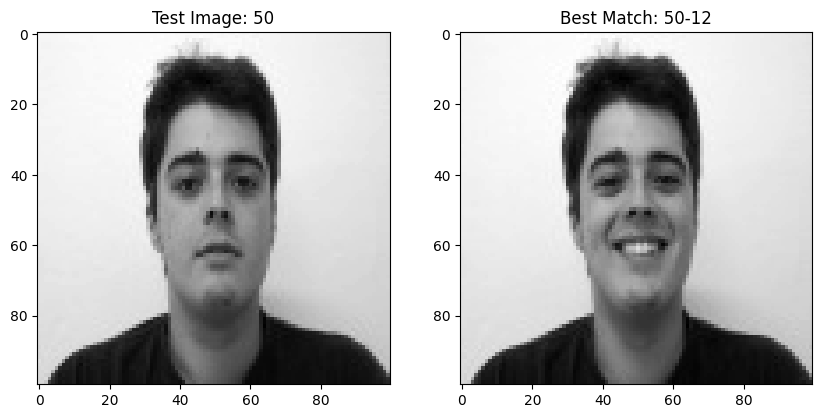

permision accepted .test image ID 50 matches with dataset image ID 50.


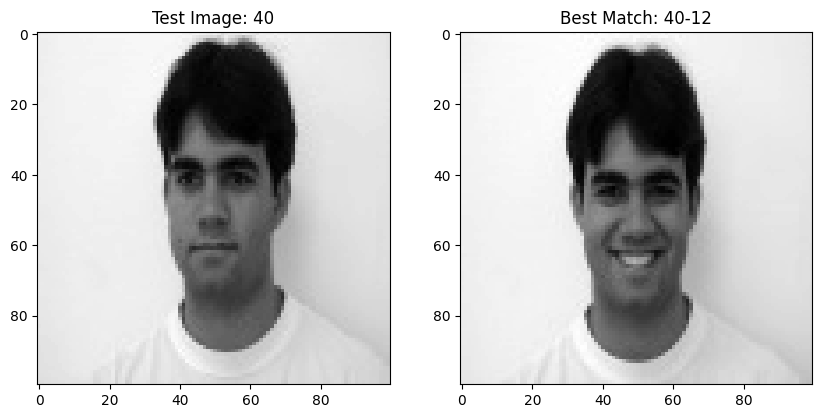

permision accepted .test image ID 40 matches with dataset image ID 40.


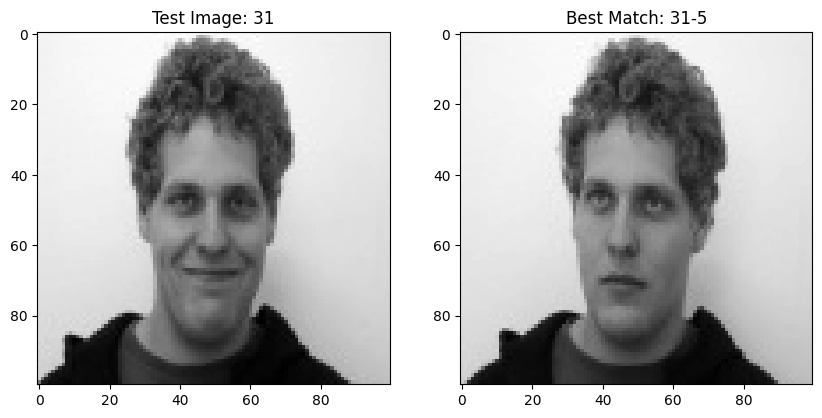

permision accepted .test image ID 31 matches with dataset image ID 31.


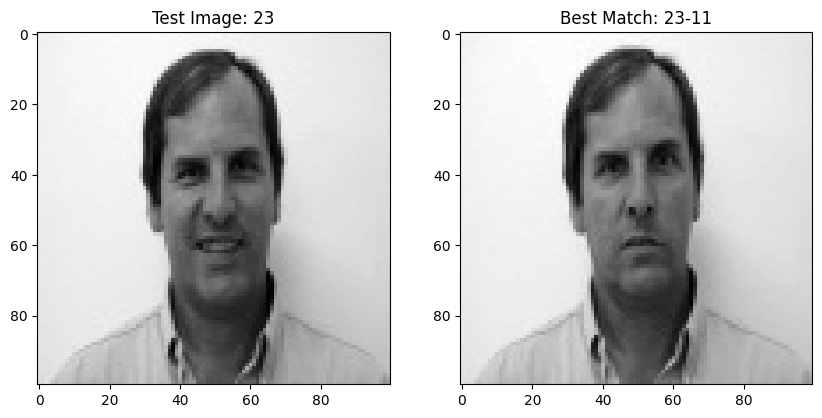

permision accepted .test image ID 23 matches with dataset image ID 23.


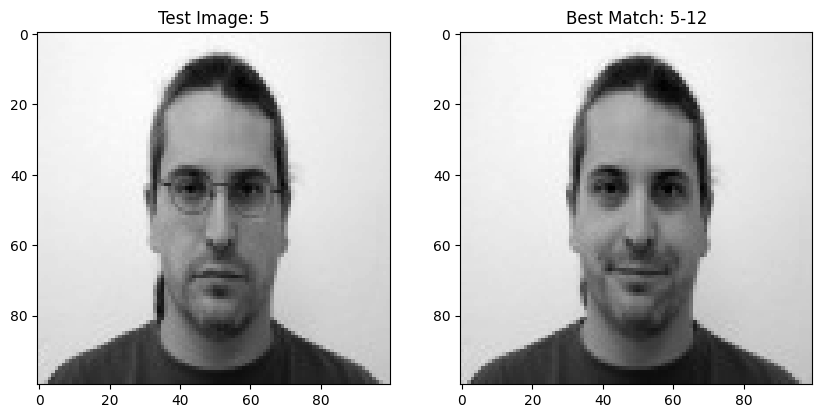

permision accepted .test image ID 5 matches with dataset image ID 5.


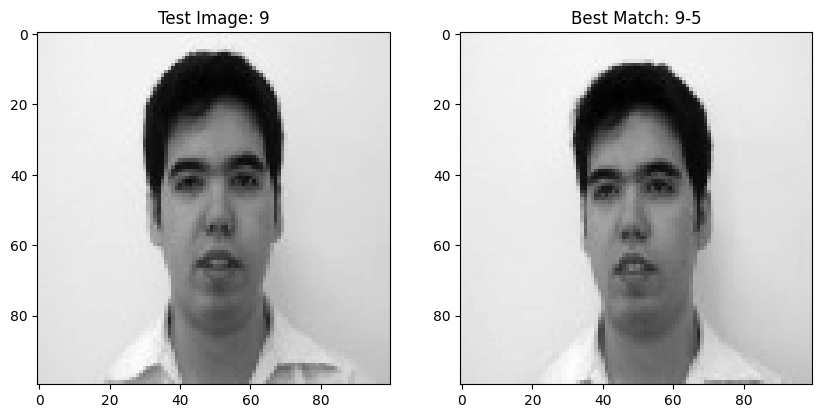

permision accepted .test image ID 9 matches with dataset image ID 9.


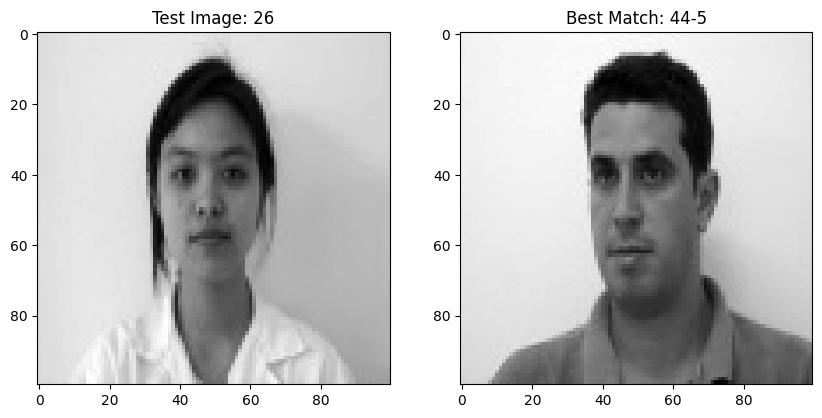

permision denied .test image ID 26 doesnot match with dataset image ID 44.


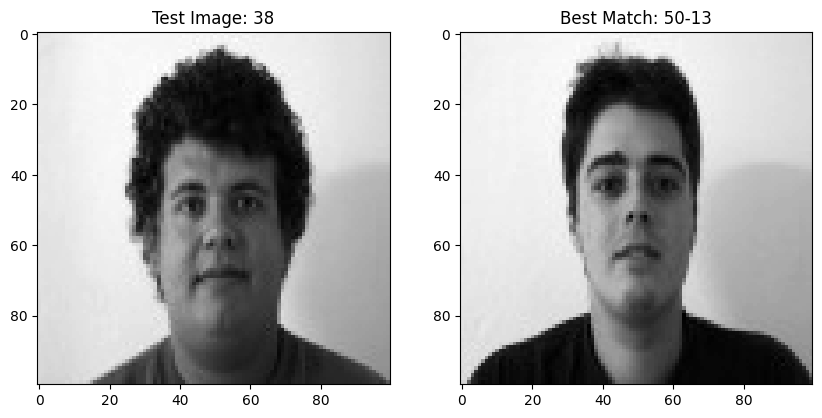

permision denied .test image ID 38 doesnot match with dataset image ID 50.


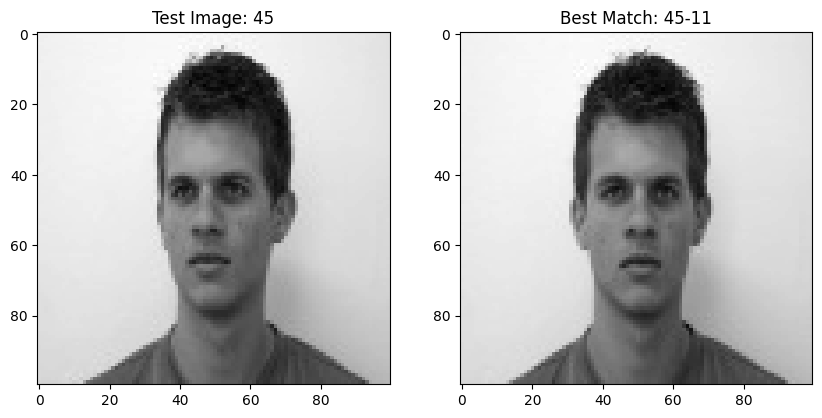

permision accepted .test image ID 45 matches with dataset image ID 45.


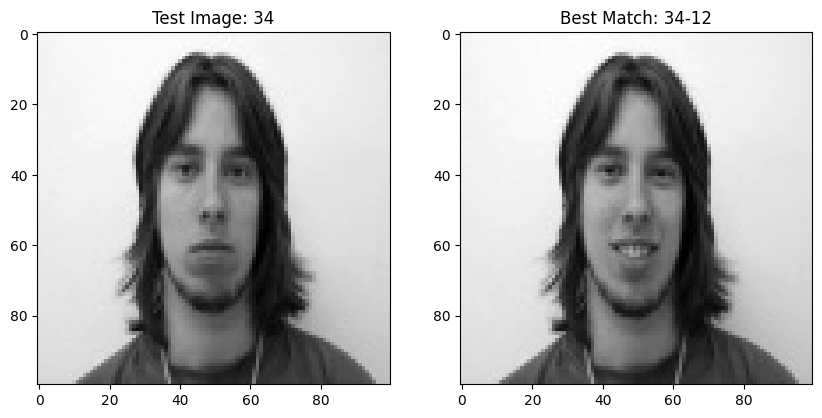

permision accepted .test image ID 34 matches with dataset image ID 34.


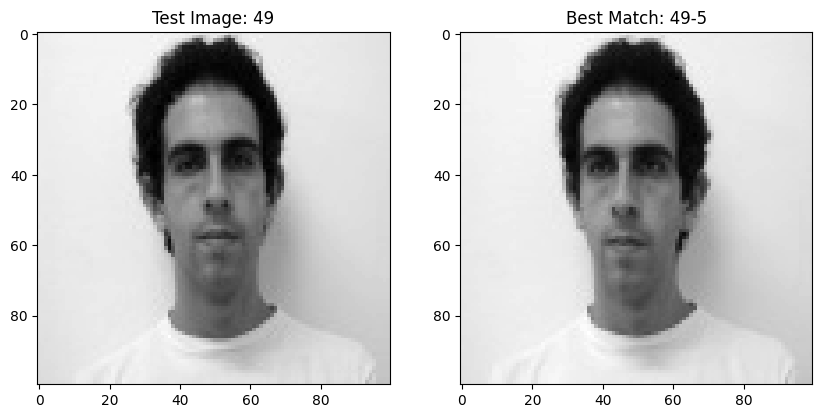

permision accepted .test image ID 49 matches with dataset image ID 49.


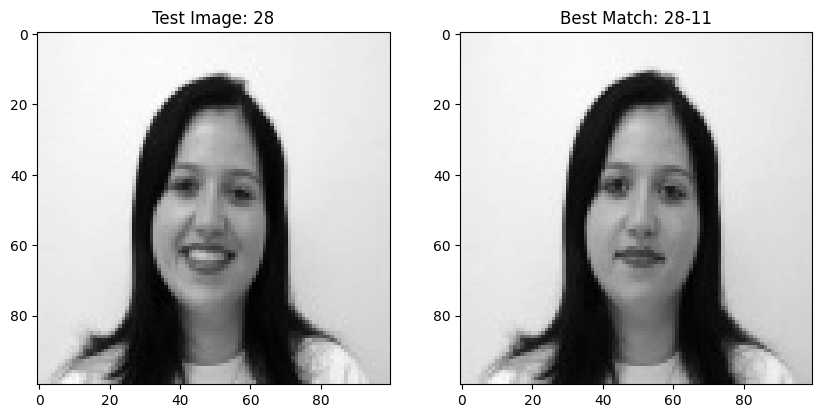

permision accepted .test image ID 28 matches with dataset image ID 28.


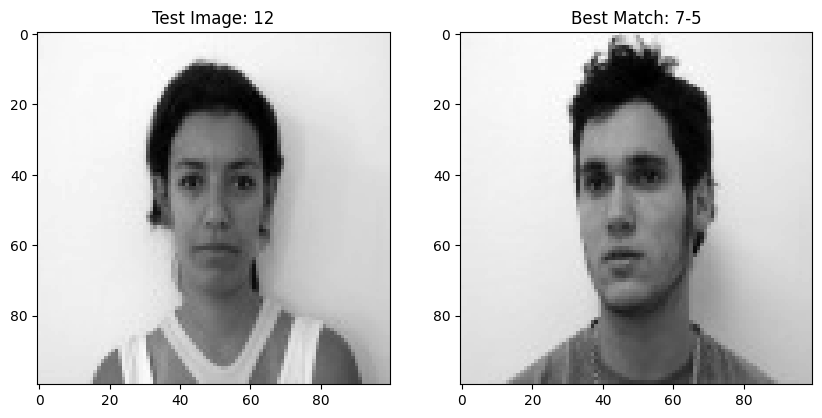

permision denied .test image ID 12 doesnot match with dataset image ID 7.


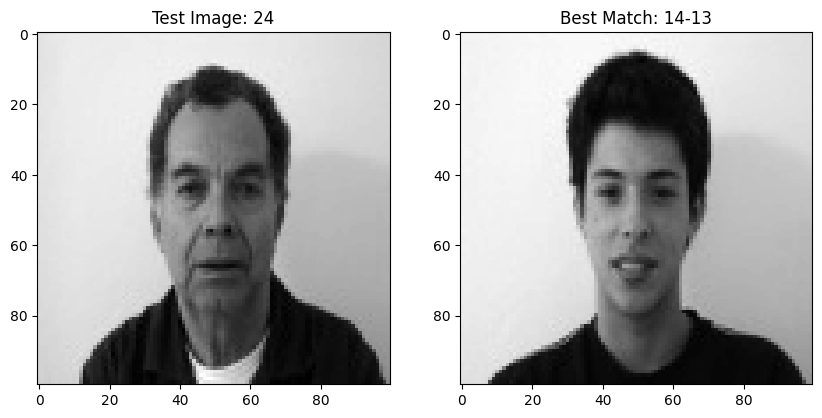

permision denied .test image ID 24 doesnot match with dataset image ID 14.


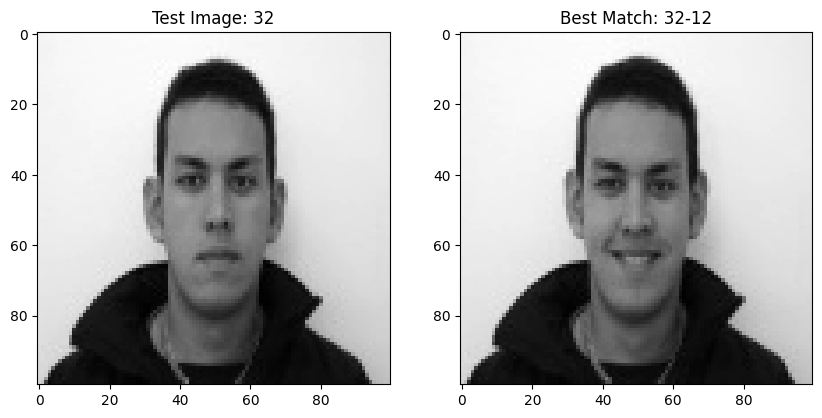

permision accepted .test image ID 32 matches with dataset image ID 32.


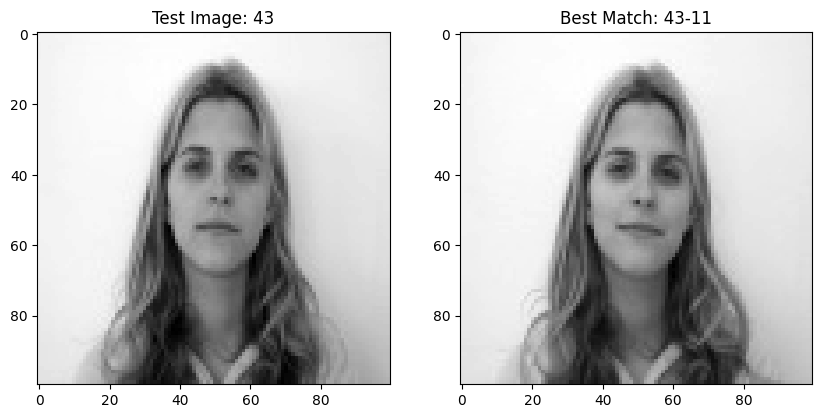

permision accepted .test image ID 43 matches with dataset image ID 43.


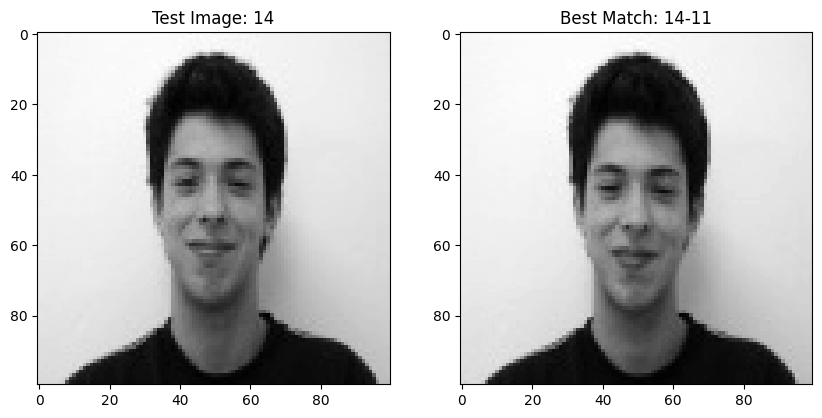

permision accepted .test image ID 14 matches with dataset image ID 14.


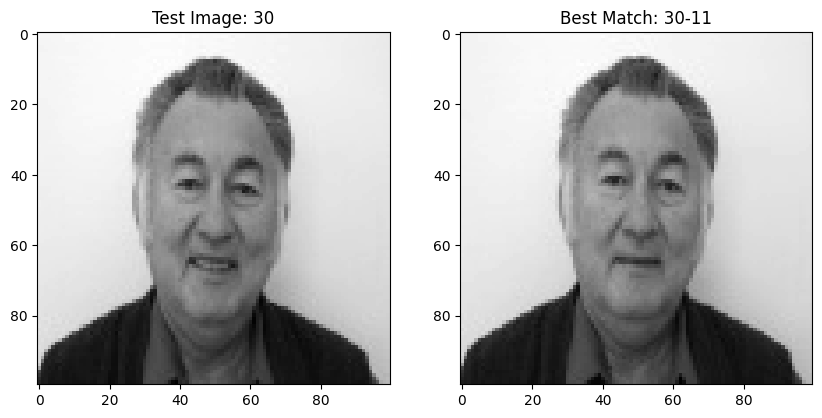

permision accepted .test image ID 30 matches with dataset image ID 30.


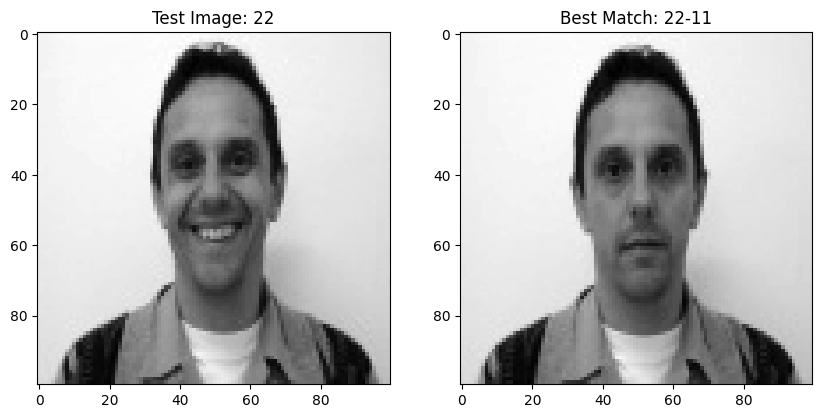

permision accepted .test image ID 22 matches with dataset image ID 22.


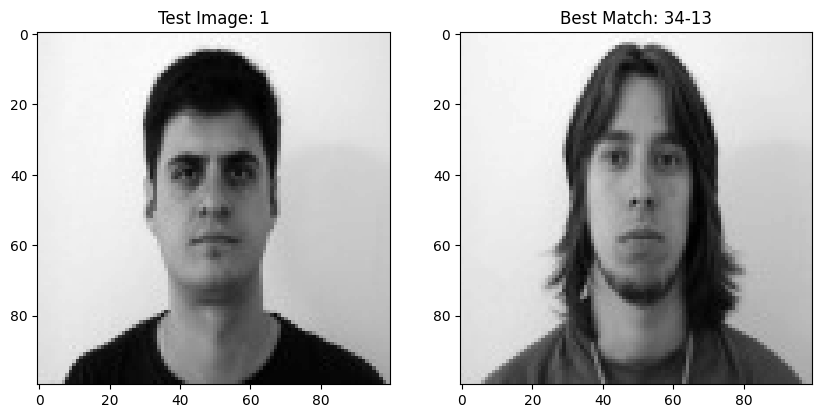

permision denied .test image ID 1 doesnot match with dataset image ID 34.


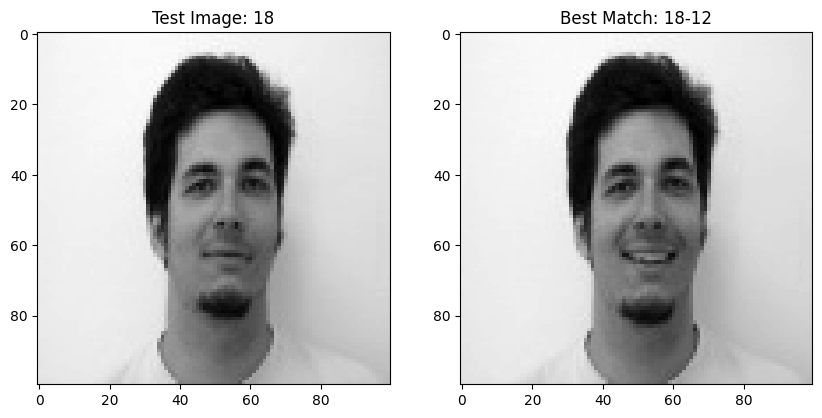

permision accepted .test image ID 18 matches with dataset image ID 18.
accuracy is : 0.7272727272727273


In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def svd(A):
    ATA = np.dot(A.T, A)
    eigenValues, eigenVectors = np.linalg.eig(ATA)
    sorted_indices_ATA = np.argsort(eigenValues)[::-1]
    eigenValues = eigenValues[sorted_indices_ATA]
    Sigma = np.sqrt(eigenValues)
    return Sigma

def loadingImageAndSVD(directory):
    svdDATa = {}
    images = {}
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            id =  filename.split('-')[0]
            index =  filename.split('-')[1].split('.')[0]
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            img = img.astype(np.float64)
            S = svd(img)
            if id not in svdDATa:
                svdDATa[id] = []
                images[id] = []
            svdDATa[id].append((int(index), S))
            images[id].append((int(index), img))
    return svdDATa, images

def distanceOfSingularValues(S1, S2):
    x = np.linalg.norm(S1 - S2)
    return x

def getFilesofDirectory(directory):
    all_files = []
    for entry in os.listdir(directory):
        full_path = os.path.join(directory, entry)
        if os.path.isfile(full_path):
            all_files.append(full_path)
    return all_files

dataset_path = '/Users/arasvalizadeh/Downloads/CQ1/Dataset'
svdDATa, images = loadingImageAndSVD(dataset_path)

testset_path = '/Users/arasvalizadeh/Downloads/CQ1/Testset'
test_files = getFilesofDirectory(testset_path)

count = 0

for test_image_path in test_files:
    test_id = test_image_path.split('/')[-1].split('-')[0]
    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    test_image = test_image.astype(np.float64)
    test_S = svd(test_image)
    matches = []
    for id, svd_list in svdDATa.items():
        for index, S in svd_list:
            distance = distanceOfSingularValues(test_S, S)
            matches.append((id, index, distance))
    matches = sorted(matches, key=lambda x: x[2])
    best_match = matches[0]
    best_match_id = best_match[0]
    best_match_index = best_match[1]
    best_match_image = None
    for idx, img in images[best_match_id]:
        if idx == best_match_index:
            best_match_image = img
            break
    try:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title(f'Test Image: {test_id}')
        plt.imshow(test_image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.title(f'Best Match: {best_match_id}-{best_match_index}')
        plt.imshow(best_match_image, cmap='gray')
        plt.show()
    except Exception as e:
        print(f"Error displaying images: {e}")
    if test_id == best_match_id:
        count += 1
        print(f"permision accepted .test image ID {test_id} matches with dataset image ID {best_match_id}.")
    else:
        print(f"permision denied .test image ID {test_id} doesnot match with dataset image ID {best_match_id}.")

print(f"accuracy is : {count / len(test_files)}")
